In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('titanic/train.csv')

### Indicator 2.1: You (re-)validate data after model generated assumptions

<font color='blue'>
    
* Create suitable statistical summaries for each of the variables
* Visualise the distribution of the variables, with special attention for the target
* Discuss the data quality and how it impacts your model</font><font color='red'>
* Look up the assumptions of the model you want to apply
* Investigate potential sources of selection bias in your dataset
* Discuss whether your rows really are independent observations
* Try to name the distributions of your numeric variables
* Find and interpret correlations in your dataset
</font>

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df[['Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

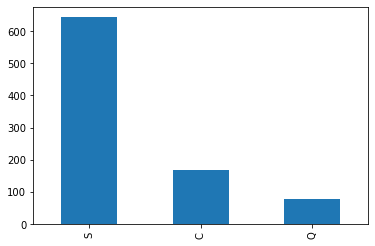

In [11]:
df.Embarked.value_counts().plot.bar()

<AxesSubplot:>

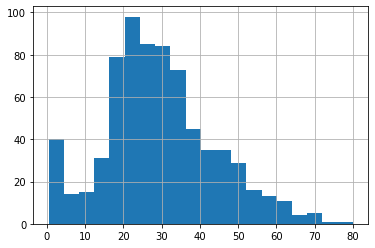

In [14]:
df.Age.hist(bins=20)
# df.Age.plot(kind='hist')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

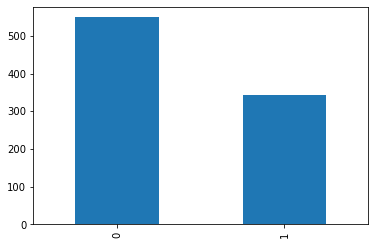

In [18]:
df.Survived.value_counts().plot.bar()

### Indicator 2.2: You integrate relevant data by merging multiple data sources

<font color='red'>
What would be needed to merge additional data sources?
</font>

### Indicator 2.3: You clean data by imputating and scaling revelant data

<font color='blue'>
    
* Discuss the consequences of omitting rows and colums with missing data</font><font color='red'>
* Discuss missing data mechanisms
* Discuss the opportunities for imputing and how they impact the model</font><font color='blue'>
* Decide how you will hande missing data
* Compare the distributions of numerical variables: is scaling relevant?</font><font color='red'>
* Discuss different scaling techniques, in relation to your model
* Decide about scaling
</font>

### Indicator 2.4: You construct data by one-hot-encoding, defining targets and labeling relevant data

<font color='blue'>
    
* Create a new variable family_size by adding siblings/ spouses and parents/ children
* Extract at least two properties from the cabin variable</font><font color='red'>
* Create one-hot-encoded (dummy) columns for variables that are not numeric</font><font color='blue'>
* EXTRA challenge: read your data without pandas (csv, xlrd, sql, …) and do all the parsing yourself
</font>

### Indicator 2.5: You convert data formats as prerequisite for relevant model technique(

<font color='blue'>
    
* Visualize relations between the target and other variables
* Discuss the type of model that you need
* Calculate a simple benchmark: look at the most common outcome (Survived) for Sex=female and Sex=male. Based on that, create predictions for the test set and upload your first submission
</font>

<AxesSubplot:>

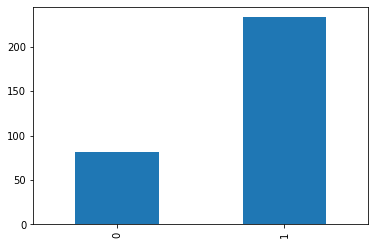

In [21]:
df[df.Sex=='female'].Survived.value_counts().sort_index().plot.bar()

<AxesSubplot:>

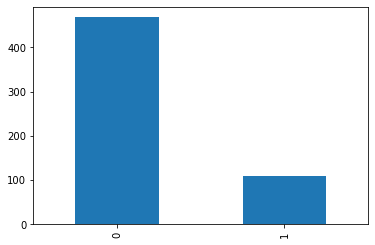

In [22]:
df[df.Sex=='male'].Survived.value_counts().sort_index().plot.bar()